### Analisi tecnica

### Backtesting medie mobili semplici ed esponenziali (MACD)
Fonte: https://www.youtube.com/watch?v=7_dxjNx2PdE&list=PLLDx60G0MrKZ66gCSCM0wvBYKfIXzv7GA&index=3&ab_channel=Pythonenthusiast


L'acronimo MACD significa Moving Averages Convergence Divergence. Si tratta forse della strategia più utilizzata[1] dagli analisti e prevede di generare segnali all'incrocio tra due medie mobili (doppio crossover); vengono utilizzate due medie, ovviamente di periodo differente. Quando quella più veloce, ovvero generata da un periodo minore, incrocerà al rialzo quella più lenta verrà generato un segnale di acquisto; viceversa quando quella lenta sarà tagliata al ribasso da quella più veloce si avrà la vendita. Anche qui i periodi scelti per la creazione delle medie mobili avranno effetto sui segnali generati: se si vorrà seguire andamenti di maggiore respiro sarà necessario aumentare i periodi delle due medie mobili, mentre se si vorranno cavalcare i movimenti di breve periodo si potranno utilizzare due medie mobili più veloci.
Fonte: Wikipedia

In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import numpy as np

style.use('ggplot')

Importiamo i dati

In [12]:
start = dt.datetime(2014, 5,31)
end = dt.datetime(2024,5, 14)
ticker = 'AAPL'
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

[*********************100%%**********************]  1 of 1 completed


Creiamo le due serie di medie mobili, una a 20 giorni (1 mese circa) una a 120 giorni (6 mesi circa)

In [13]:

data['SMA20'] = data['Adj Close'].rolling(20).mean()
data['SMA120'] = data['Adj Close'].rolling(120).mean()


In [14]:
data.head(21)

,Adj Close,Volume,SMA20,SMA120
Date,,,,
2014-06-02,19.859394,369350800,NaN,NaN
2014-06-03,20.140230,292709200,NaN,NaN
2014-06-04,20.370213,335482000,NaN,NaN
2014-06-05,20.450136,303805600,NaN,NaN
2014-06-06,20.393908,349938400,NaN,NaN
2014-06-09,20.720242,301660000,NaN,NaN
2014-06-10,20.841856,251108000,NaN,NaN
2014-06-11,20.755623,182724000,NaN,NaN
2014-06-12,20.408436,218996000,NaN,NaN


In [15]:
data.tail()

,Adj Close,Volume,SMA20,SMA120
Date,,,,
2024-05-07,182.152924,77305800,171.571287,181.939508
2024-05-08,182.492477,45057100,172.318274,181.902382
2024-05-09,184.320007,48983000,172.794129,181.875748
2024-05-10,183.050003,50759500,173.131086,181.824402
2024-05-13,186.279999,72044800,173.822282,181.800138


Grafico della serie originale e delle due medie mobili

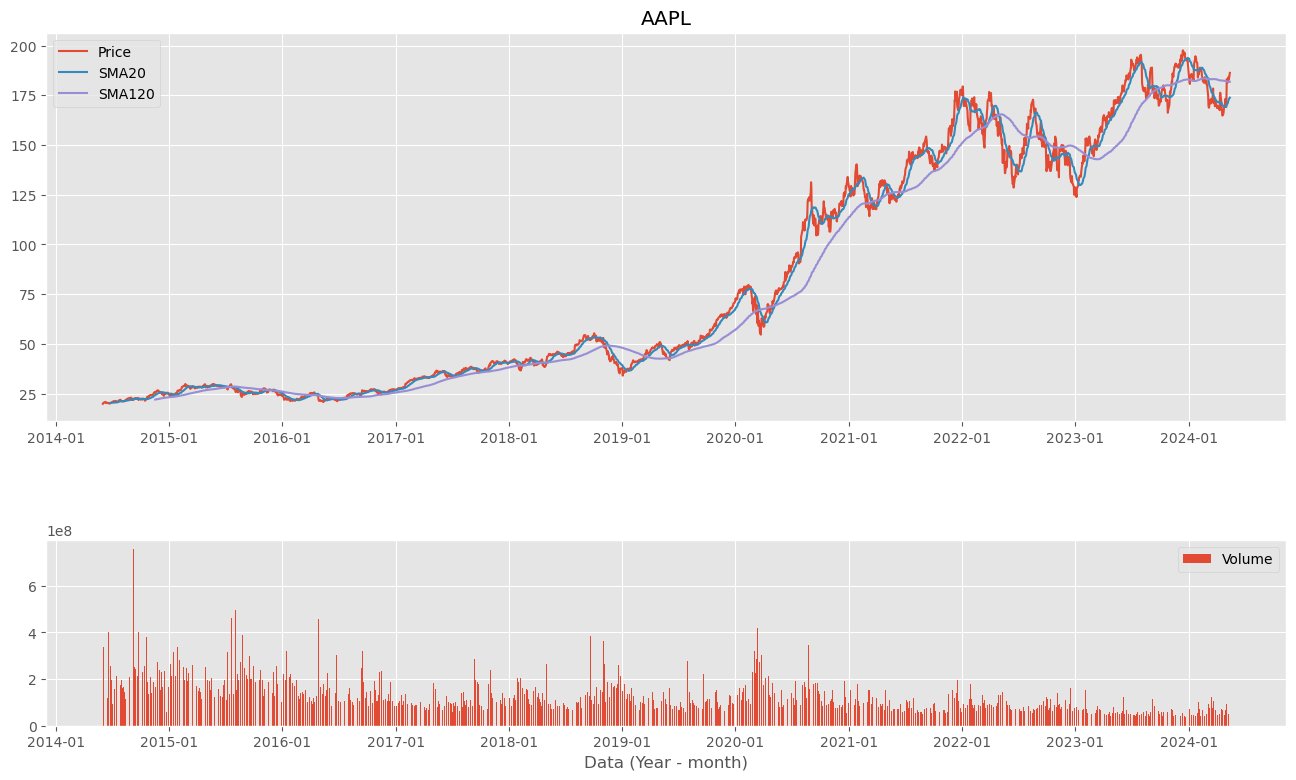

In [16]:

plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.set_xlabel('Data (Year - month)')
ax1.legend()
ax2.legend();


Creiamo la strategia

In [17]:
data['Price_yesterday'] = data['Adj Close'].shift(1)
data['Change'] = data['Adj Close'] / data['Price_yesterday']
data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]

Rendimento della strategia

In [18]:
sma = data[data['Invested_SMA'] == 1]

In [19]:
sma.head()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA
Date,,,,,,,
2014-11-18,25.772602,176896000,24.249851,21.972352,25.442272,1.012984,1
2014-11-19,25.594044,167476800,24.385160,22.020141,25.772602,0.993072,1
2014-11-20,25.960087,173582000,24.518326,22.068640,25.594044,1.014302,1
2014-11-21,25.995798,228717200,24.648944,22.115520,25.960087,1.001376,1
2014-11-24,26.477907,189803200,24.804890,22.165751,25.995798,1.018546,1


In [20]:
#sma.loc[:,'Return'] = np.cumprod(sma['Change'])

In [27]:
pippo = sma['Change'].cumprod()
pippo.head()

Date
2014-11-18    1.012984
2014-11-19    1.005965
2014-11-20    1.020353
2014-11-21    1.021756
2014-11-24    1.040705
Name: Change, dtype: float64

In [28]:
sma['Return'] = pippo

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_13664\1700941935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = pippo


In [19]:
sma.head()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,Return
Date,,,,,,,,
2014-11-18 00:00:00,25.772606,176896000.0,24.249850,21.972352,25.442272,1.012984,1.0,1.012984
2014-11-19 00:00:00,25.594042,167476800.0,24.385159,22.020141,25.772606,0.993072,1.0,1.005965
2014-11-20 00:00:00,25.960089,173582000.0,24.518326,22.068640,25.594042,1.014302,1.0,1.020353
2014-11-21 00:00:00,25.995798,228717200.0,24.648944,22.115520,25.960089,1.001376,1.0,1.021756
2014-11-24 00:00:00,26.477901,189803200.0,24.804889,22.165751,25.995798,1.018545,1.0,1.040705


In [22]:
sma.loc[:,'rtn'] =sma['Return'].pct_change(fill_method=None)
print(sma['rtn'])

Date
2014-11-18 00:00:00         NaN
2014-11-19 00:00:00   -0.006928
2014-11-20 00:00:00    0.014302
2014-11-21 00:00:00    0.001376
2014-11-24 00:00:00    0.018545
                         ...   
2024-02-28 00:00:00   -0.006625
2024-02-29 00:00:00   -0.003693
2024-03-01 00:00:00   -0.006030
2024-03-04 00:00:00   -0.025381
Date                        NaN
Name: rtn, Length: 1730, dtype: float64


In [23]:
sma['rtn'].mean()*252

0.21383205993208368

In [24]:
sma['rtn'].std()*np.sqrt(252)

0.2702613645021175

In [25]:
sma['rtn'].mean()*252 / (sma['rtn'].std()*np.sqrt(252))

0.7912046930052715

Rendimento del buy and hold

In [26]:
data['Buy_and_hold'] = np.cumprod(data['Change'])
data['rtn'] = data['Buy_and_hold'].pct_change()
print(data['rtn'].mean()*252)
print(data['rtn'].std()*np.sqrt(252))

0.2643166697422723
0.2837363444901218


In [27]:
data['rtn'].mean()*252 / (data['rtn'].std()*np.sqrt(252))

0.9315573238150123

Confronto fra i due

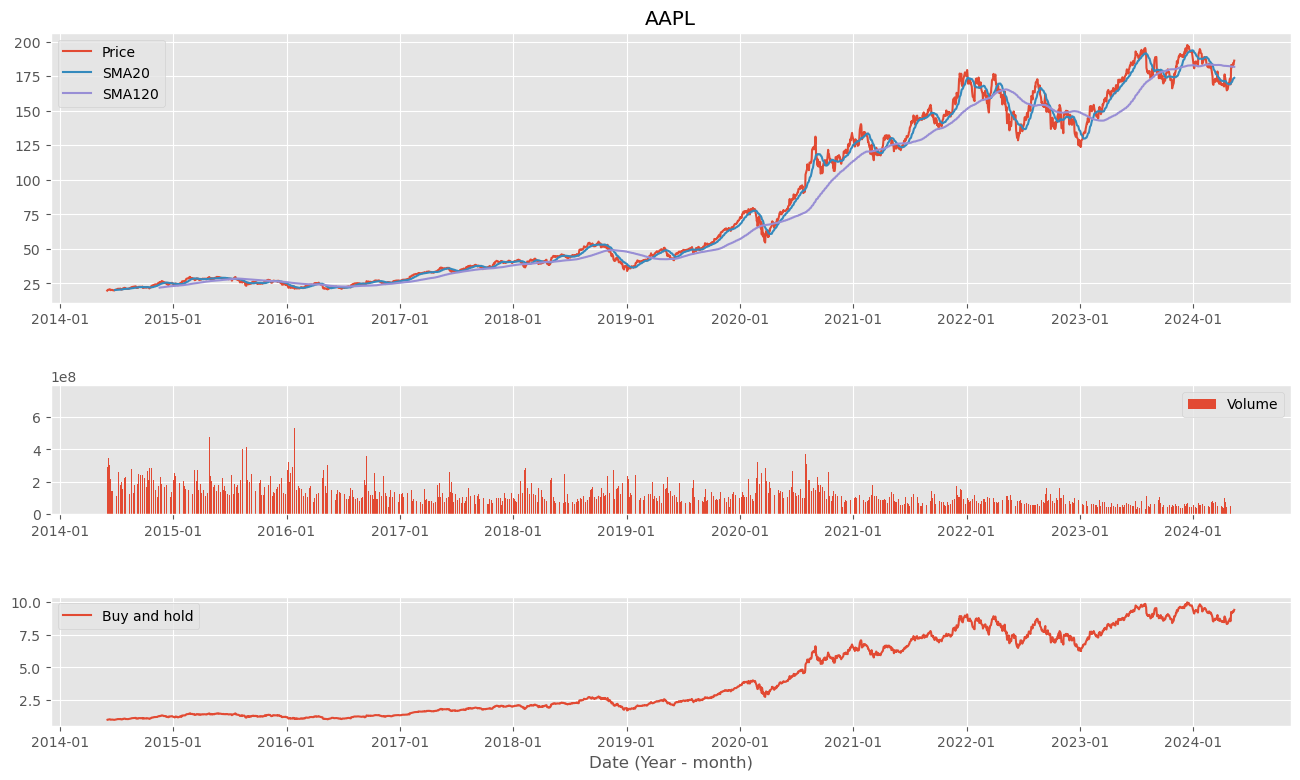

In [29]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
#ax3.plot(sma['Return'], label = 'SMA')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


In [33]:
data.tail()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,Buy_and_hold,rtn
Date,,,,,,,,,
2024-05-07,182.152924,77305800,171.571287,181.939508,181.463882,1.003797,0,9.172130,0.003797
2024-05-08,182.492477,45057100,172.318274,181.902382,182.152924,1.001864,0,9.189228,0.001864
2024-05-09,184.320007,48983000,172.794129,181.875748,182.492477,1.010014,0,9.281251,0.010014
2024-05-10,183.050003,50759500,173.131086,181.824402,184.320007,0.993110,0,9.217301,-0.006890
2024-05-13,186.279999,72044800,173.822282,181.800138,183.050003,1.017645,0,9.379945,0.017645


In [30]:
data['Buy_and_hold'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_12400\3123283541.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Buy_and_hold'][-1]


9.379944623729374

In [32]:
sma.tail()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,Return,rtn
Date,,,,,,,,,
2024-02-28 00:00:00,181.174255,48953900.0,184.623997,183.348053,182.382629,0.993375,1.0,3.537578,-0.006625
2024-02-29 00:00:00,180.505173,136682600.0,184.453478,183.378425,181.174255,0.996307,1.0,3.524514,-0.003693
2024-03-01 00:00:00,179.416656,73488000.0,184.105856,183.394580,180.505173,0.993970,1.0,3.503260,-0.006030
2024-03-04 00:00:00,174.862823,81510100.0,183.580910,183.362992,179.416656,0.974619,1.0,3.414342,-0.025381
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
sma['Return'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_12400\3622598113.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sma['Return'][-1]


nan

Medie mobili esponenziali

In [39]:
data['EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
ewm = data[data['Invested_EWM'] == 1]
ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_12400\3814094305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])


In [40]:
ewm.head()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA,Buy_and_hold,rtn,EWM12,EWM26,Invested_EWM,Return
Date,,,,,,,,,,,,,
2014-06-03,20.140236,292709200,NaN,NaN,19.859392,1.014142,0,1.014142,NaN,19.902599,19.880195,1,1.014142
2014-06-04,20.370214,335482000,NaN,NaN,20.140236,1.011419,0,1.025722,0.011419,19.974540,19.916493,1,1.025722
2014-06-05,20.450140,303805600,NaN,NaN,20.370214,1.003924,0,1.029747,0.003924,20.047709,19.956023,1,1.029747
2014-06-06,20.393908,349938400,NaN,NaN,20.450140,0.997250,0,1.026915,-0.002750,20.100970,19.988458,1,1.026915
2014-06-09,20.720234,301660000,NaN,NaN,20.393908,1.016001,0,1.043347,0.016001,20.196242,20.042664,1,1.043347


Confronto delle tre strategie

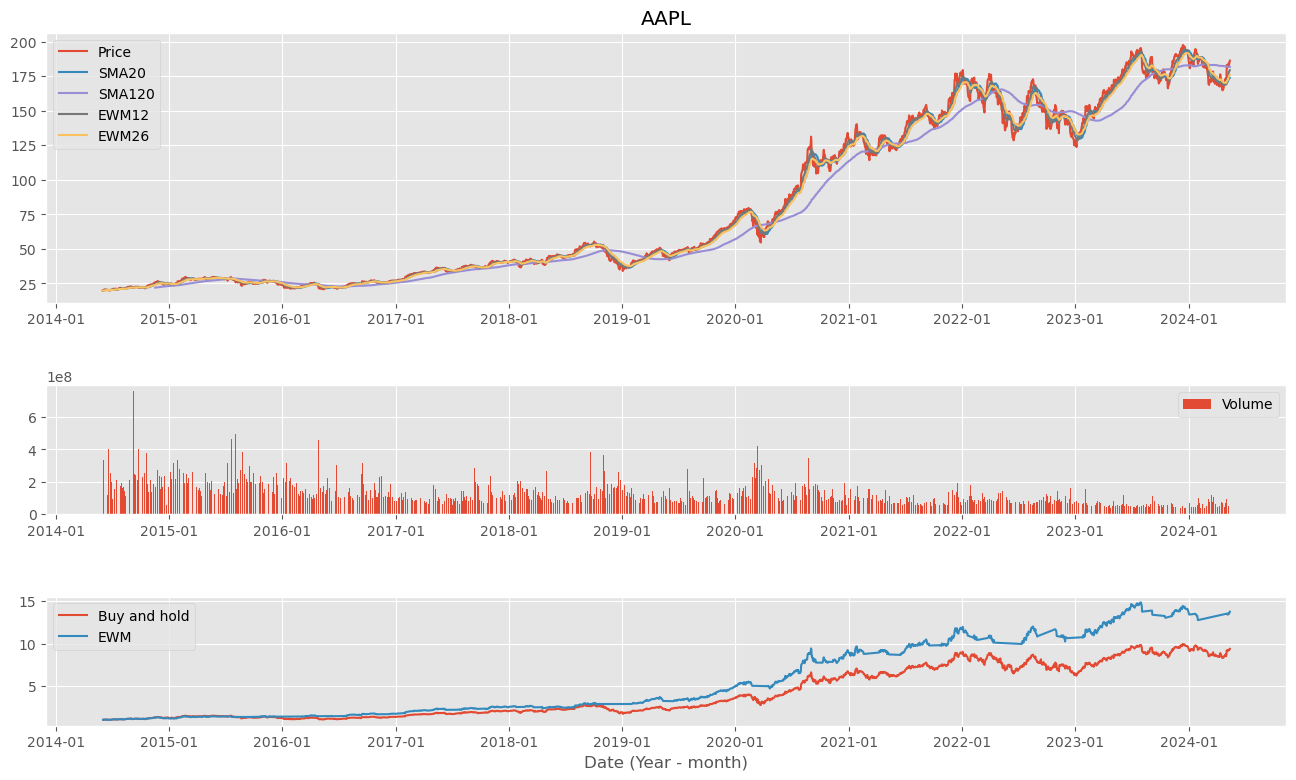

In [42]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')
ax1.plot(data['EWM12'], label = 'EWM12')
ax1.plot(data['EWM26'], label = 'EWM26')

ax2.bar(data.index, data['Volume'], label = 'Volume')
ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
#ax3.plot(sma['Return'], label = 'SMA')
ax3.plot(ewm['Return'], label ='EWM')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


### Simulazione con più titoli

In [42]:
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN']
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['SMA20'] = data['Adj Close'].rolling(20).mean()
    data['SMA120'] = data['Adj Close'].rolling(120).mean()
    data['EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
    data['EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['Price_yesterday'] = data['Adj Close'].shift(1)
    data['Change'] = data['Adj Close'] / data['Price_yesterday']
    data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]
    data['Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
    data['Buy_and_hold'] = np.cumprod(data['Change'])
    sma = data[data['Invested_SMA'] == 1]
    sma['Return'] = np.cumprod(sma['Change'])
    ewm = data[data['Invested_EWM'] == 1]
    ewm['Return'] = np.cumprod(ewm['Change'])
    print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
    print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
    print('EWM return: ' + ticker + ' ' + str(ewm['Return'][-1]))


C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


Buy and hold strategy return: AAPL 5.737869874688064
SMA return: AAPL 2.9042661535976513
EWM return: AAPL 8.538107288190085


C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


Buy and hold strategy return: KO 1.9033301043215707
SMA return: KO 1.2238958763563557
EWM return: KO 1.7903693077928555


C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


Buy and hold strategy return: MSFT 5.888791221774484
SMA return: MSFT 3.584922824461911
EWM return: MSFT 5.280206977063933


C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


Buy and hold strategy return: TSLA 12.36810852553085
SMA return: TSLA 5.617860067032761
EWM return: TSLA 42.823328336178896
Buy and hold strategy return: AMZN 5.991183736371956
SMA return: AMZN 3.2355019403701624
EWM return: AMZN 11.278838988399853


C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\SC3DF~1.BEN\AppData\Local\Temp/ipykernel_2192/3566992536.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


### Relative Strength Index (RSI)

Il Relative Strength Index (RSI), o indice di forza relativa, è uno fra gli oscillatori più popolari dell'analisi tecnica e comunemente usati dai traders, in particolar modo da quelli che operano sui mercati dei futures. Fu ideato da John Welles Wilder, che lo pubblicò nel suo libro New Concepts in Technical Trading System nel 1978.

Si tratta di un indicatore di momentum, che riesce però ad ovviare ad alcuni problemi presenti nel momentum, nel Rate of change o in altri oscillatori di questo tipo. Questi generano notevoli complicazioni nella loro interpretazione, soprattutto quando si verificano bruschi movimenti del mercato causandone un'improvvisa inversione della linea. È quindi necessario, per una corretta e più comprensibile analisi, minimizzare queste distorsioni.

Il Relative Stregth Index, oltre a risolvere questo problema, presenta una banda d'oscillazione costante, da 0 a 100, che permette una comparazione dei valori con alcuni livelli costanti prestabiliti.

Va comunque sottolineato come il termine "indice di forza relativa" sia improprio, generando confusione anche in chi lo utilizza regolarmente. Infatti, con "forza relativa" solitamente si intende un grafico lineare che mette in rapporto due differenti entità, come per esempio un'azione e il suo indice di appartenenza, due indici settoriali, una materia prima e un cambio monetario, ecc. L'indice ideato da Wilder non misura alcuna di queste correlazioni, traendo quindi in inganno.

Fonte: Wikipedia

In [67]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022,11,29)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN']
ticker = 'TSLA'
data = web.DataReader(ticker, 'yahoo', start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

In [68]:
data['abs_change'] = data['Adj Close'].diff(1)
data['up'] = [1 if data.loc[i, 'abs_change'] >  0 else 0 for i in data.index]
data['down'] = [1 if data.loc[i, 'abs_change'] <  0 else 0 for i in data.index]

In [69]:
data.head(20)

,Volume,Adj Close,abs_change,up,down
Date,,,,,
2015-01-02,71466000.0,14.620667,NaN,0,0
2015-01-05,80527500.0,14.006000,-0.614668,0,1
2015-01-06,93928500.0,14.085333,0.079333,1,0
2015-01-07,44526000.0,14.063333,-0.022000,0,1
2015-01-08,51637500.0,14.041333,-0.021999,0,1
2015-01-09,70024500.0,13.777333,-0.264000,0,1
2015-01-12,89254500.0,13.480667,-0.296666,0,1
2015-01-13,67159500.0,13.616667,0.136000,1,0
2015-01-14,173278500.0,12.846000,-0.770667,0,1


In [70]:
data['positive_movement'] = data['up'] * data['abs_change']
data['negative_movement'] = data['down'] * data['abs_change'] * - 1

In [71]:
data.head(20)

,Volume,Adj Close,abs_change,up,down,positive_movement,negative_movement
Date,,,,,,,
2015-01-02,71466000.0,14.620667,NaN,0,0,NaN,NaN
2015-01-05,80527500.0,14.006000,-0.614668,0,1,-0.000000,0.614668
2015-01-06,93928500.0,14.085333,0.079333,1,0,0.079333,-0.000000
2015-01-07,44526000.0,14.063333,-0.022000,0,1,-0.000000,0.022000
2015-01-08,51637500.0,14.041333,-0.021999,0,1,-0.000000,0.021999
2015-01-09,70024500.0,13.777333,-0.264000,0,1,-0.000000,0.264000
2015-01-12,89254500.0,13.480667,-0.296666,0,1,-0.000000,0.296666
2015-01-13,67159500.0,13.616667,0.136000,1,0,0.136000,-0.000000
2015-01-14,173278500.0,12.846000,-0.770667,0,1,-0.000000,0.770667


In [72]:
data['avg_gain'] = data['positive_movement'].rolling(14).mean()
data['avg_loss'] = data['negative_movement'].rolling(14).mean()

In [73]:
data.head(20)

,Volume,Adj Close,abs_change,up,down,positive_movement,negative_movement,avg_gain,avg_loss
Date,,,,,,,,,
2015-01-02,71466000.0,14.620667,NaN,0,0,NaN,NaN,NaN,NaN
2015-01-05,80527500.0,14.006000,-0.614668,0,1,-0.000000,0.614668,NaN,NaN
2015-01-06,93928500.0,14.085333,0.079333,1,0,0.079333,-0.000000,NaN,NaN
2015-01-07,44526000.0,14.063333,-0.022000,0,1,-0.000000,0.022000,NaN,NaN
2015-01-08,51637500.0,14.041333,-0.021999,0,1,-0.000000,0.021999,NaN,NaN
2015-01-09,70024500.0,13.777333,-0.264000,0,1,-0.000000,0.264000,NaN,NaN
2015-01-12,89254500.0,13.480667,-0.296666,0,1,-0.000000,0.296666,NaN,NaN
2015-01-13,67159500.0,13.616667,0.136000,1,0,0.136000,-0.000000,NaN,NaN
2015-01-14,173278500.0,12.846000,-0.770667,0,1,-0.000000,0.770667,NaN,NaN


In [74]:
data['RS'] = data['avg_gain'] / data['avg_loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

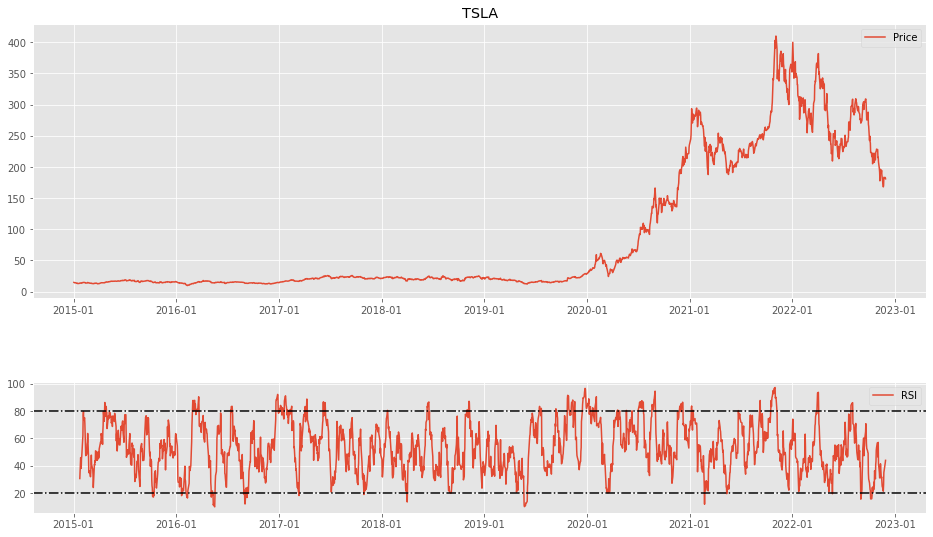

In [75]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax2.plot(data['RSI'], label = 'RSI')
ax2.axhline(80, linestyle = '-.', color = 'black')
ax2.axhline(20, linestyle = '-.', color = 'black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()
ax2.legend()
plt.show()         

#### RSI - Simulazione con più titoli

In [76]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022,11,29)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
results = pd.DataFrame(columns = ['Ticker', 'RSI'])


In [77]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['abs_change'] = data['Adj Close'].diff(1)
    data['up'] = [1 if data.loc[i, 'abs_change'] >  0 else 0 for i in data.index]
    data['down'] = [1 if data.loc[i, 'abs_change'] <  0 else 0 for i in data.index]
    data['positive_movement'] = data['up'] * data['abs_change']
    data['negative_movement'] = data['down'] * data['abs_change'] * - 1
    data['avg_gain'] = data['positive_movement'].rolling(14).mean()
    data['avg_loss'] = data['negative_movement'].rolling(14).mean()
    data['RS'] = data['avg_gain'] / data['avg_loss']
    data['RSI'] = 100 - (100 / (1 + data['RS']))
    
    new_row = {'Ticker': ticker, 'RSI': data['RSI'][-1]}
    results = results.append(new_row, ignore_index = True)
    

In [78]:
print(results)

  Ticker        RSI
0   AAPL  51.958711
1     KO  71.884513
2   MSFT  62.765072
3   TSLA  43.837552
4   AMZN  53.791167
5    BAC  48.948370


### Bande di Bollinger

Le bande di Bollinger si basano sulla volatilità di un titolo. La volatilità è misurata come deviazione standard (standard deviation) - statisticamente definita come scarto quadratico medio o radice quadrata della varianza.

Per calcolare le bande di Bollinger si usa dapprima una media mobile a G giorni (spesso 20) a cui viene aggiunto o sottratto il valore della deviazione standard moltiplicata per un determinato fattore F (spesso intorno a 2).

La banda superiore è quindi ottenuta aggiungendo alla media mobile F volte la deviazione standard. La banda centrale (se la si vuole visualizzare) è data dalla media mobile. La banda inferiore è calcolata sottraendo alla media mobile F volte la deviazione standard.

Una maggiore ampiezza delle bande corrisponde a un'alta volatilità. Una minore ampiezza corrisponde viceversa a una bassa volatilità. Bande convergenti rappresentano volatilità in diminuzione. Bande divergenti rappresentano volatilità in aumento.

È possibile variare leggermente i parametri G ed F. Valori che secondo lo stesso Bollinger possono essere utilizzati sono i seguenti:

G = 20 e F = 2 Valido in generale;
G = 10 e F = 1.9 Se c'è la necessità di usare una media mobile molto corta;
G = 50 e F = 2.1 Se c'è la necessità di usare una media mobile molto lunga.
Lo stesso John Bollinger consiglia di non variare la lunghezza della Media Mobile (G) ma piuttosto di passare da barre daily a barre settimanali o mensili (per trading a lungo termine) o a barre di 1 ora o 5 minuti (per trading intraday).

Approssimativamente, dal punto di vista operativo, le bande di Bollinger danno segnali di acquisto e vendita quando si verificano le seguenti condizioni:

- quando il grafico del prezzo esce dalla banda superiore e successivamente vi rientra, si ottiene un segnale di vendita; questo corrisponde a un rapido aumento del prezzo e a un successivo rallentamento o aggiustamento;
- quando il grafico del prezzo esce dalla banda inferiore e successivamente vi rientra, si ottiene un segnale di acquisto; cioè il prezzo è calato molto velocemente fino ad arrestarsi e -probabilmente- a invertire il trend.

In realtà le bande di Bollinger da sole possono dare falsi segnali in quanto per esempio il grafico potrebbe uscire in basso, rientrare e continuare il trend discendente. Per questo motivo, John Bollinger consiglia di utilizzare altri indicatori, non correlati, per testare il comportamento delle bande. Quando 2 o più indicatori confermano il comportamento delle bande, allora il segnale acquista significato (sempre nei limiti della relativa validità predittiva della Analisi Tecnica).

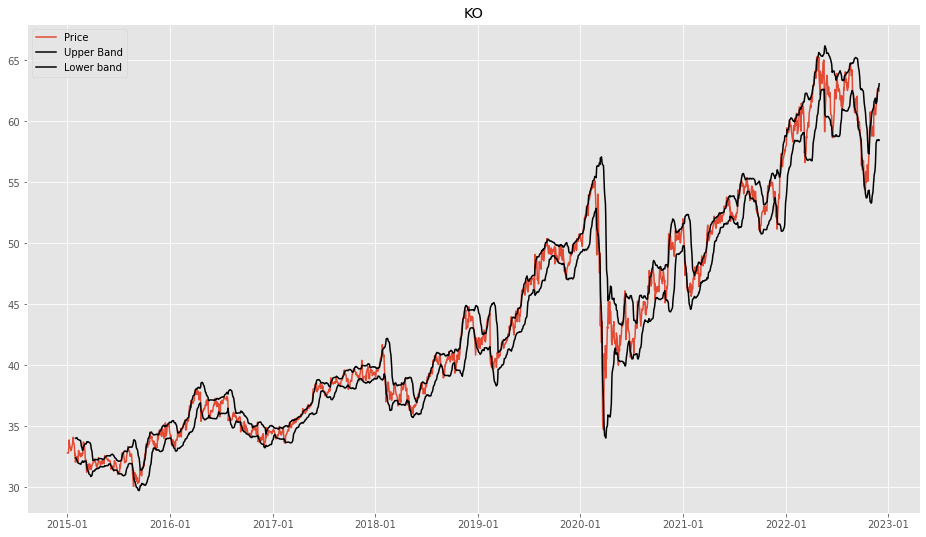

In [79]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022,11,29)
#tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
ticker = 'KO'
#results = pd.DataFrame(columns = ['Ticker', 'RSI'])
data = web.DataReader(ticker, 'yahoo', start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data['20_std'] = data['Adj Close'].rolling(20).std()
data['Upper_band'] = data['20_MA'] + 1.65 * data['20_std']
data['Lower_band'] = data['20_MA'] - 1.65 * data['20_std']



plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan = 1, colspan = 1, title = ticker)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['Upper_band'], label = 'Upper Band', color = 'black')
ax1.plot(data['Lower_band'], label = 'Lower band', color = 'black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax1.legend()
plt.show()         

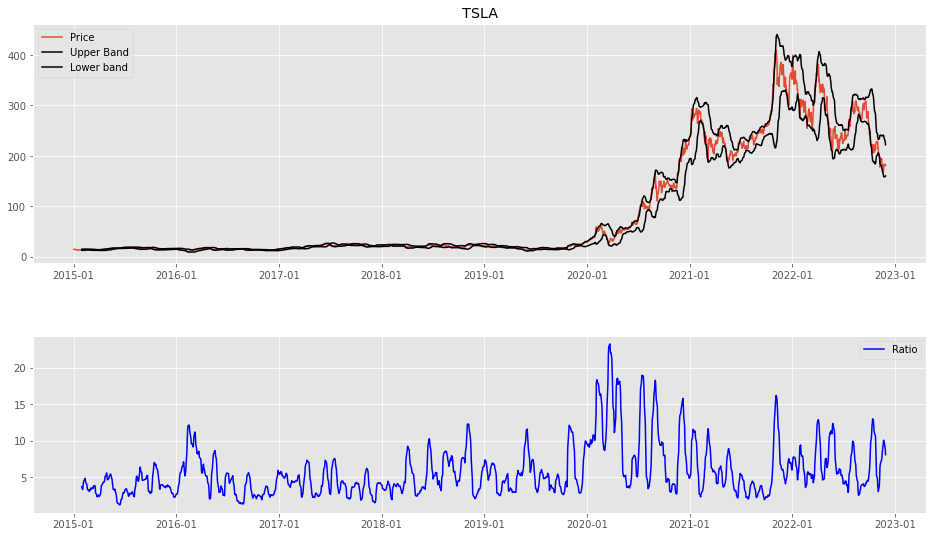

In [80]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022,11,29)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
ticker = 'TSLA'
results = pd.DataFrame(columns = ['Ticker', 'RSI'])
data = web.DataReader(ticker, 'yahoo', start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data['20_std'] = data['Adj Close'].rolling(20).std()
data['Upper_band'] = data['20_MA'] + 2 * data['20_std']
data['Lower_band'] = data['20_MA'] - 2 * data['20_std']
data['Ratio'] = data['20_std'] / data['20_MA'] * 100


plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['Upper_band'], label = 'Upper Band', color = 'black')
ax1.plot(data['Lower_band'], label = 'Lower band', color = 'black')
ax2.plot(data['Ratio'], label = 'Ratio', color = 'blue')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
plt.show()         

Misuriamo il ratio su più titoli - Uno "screener"

In [81]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2021,11,26)
tickers = ['^GSPC','AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']

results = pd.DataFrame(columns = ['Ticker', 'Ratio'])

for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['20_MA'] = data['Adj Close'].rolling(20).mean()
    data['20_std'] = data['Adj Close'].rolling(20).std()
    data['Upper_band'] = data['20_MA'] + 2 * data['20_std']
    data['Lower_band'] = data['20_MA'] - 2 * data['20_std']
    data['Ratio'] = data['20_std'] / data['20_MA'] * 100
    
    new_row = {'Ticker': ticker, 'Ratio': data['Ratio'][-1]}
    results = results.append(new_row, ignore_index = True)

print(results)

  Ticker     Ratio
0  ^GSPC  0.743898
1   AAPL  3.166717
2     KO  1.318340
3   MSFT  1.185725
4   TSLA  6.043151
5   AMZN  2.915466
6    BAC  1.569693


### MACD con "Signal line" - 2

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line. Moving average convergence divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

MACD=12-Period EMA − 26-Period EMA
﻿

MACD is calculated by subtracting the long-term EMA (26 periods) from the short-term EMA (12 periods). An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.

The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

The MACD has a positive value (shown as the blue line in the lower chart) whenever the 12-period EMA (indicated by the red line on the price chart) is above the 26-period EMA (the blue line in the price chart) and a negative value when the 12-period EMA is below the 26-period EMA. The more distant the MACD is above or below its baseline indicates that the distance between the two EMAs is growing.

In the following chart, you can see how the two EMAs applied to the price chart correspond to the MACD (blue) crossing above or below its baseline (dashed) in the indicator below the price chart.



In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [83]:
start = dt.datetime(2020, 1, 27)
end = dt.datetime(2022,11,29)
ticker = 'AAPL'
data = web.DataReader(ticker, 'yahoo', start, end)

In [84]:
exp1 = data['Close'].ewm(span=12, adjust = False).mean()
exp2 = data['Close'].ewm(span=26, adjust = False).mean()

In [85]:
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust = False).mean()

In [86]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal line
Date,,,,,,,,
2022-11-22,150.419998,146.929993,148.130005,150.179993,51804100.0,150.179993,0.845935,0.048295
2022-11-23,151.830002,149.339996,149.449997,151.070007,58301400.0,151.070007,1.032511,0.245138
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001,0.930796,0.382270
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001,0.530185,0.411853
2022-11-29,144.809998,140.350006,144.289993,141.169998,83679400.0,141.169998,-0.033032,0.322876


<IPython.core.display.Javascript object>


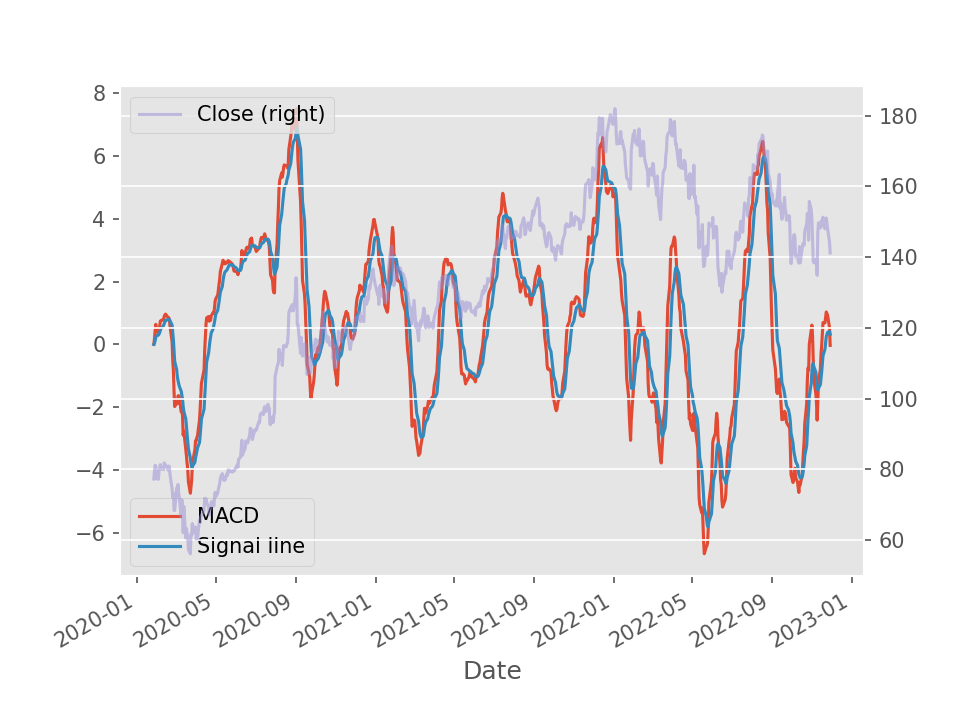

In [87]:
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax = ax, alpha = 0.50, secondary_y = True)
plt.legend();

### Stocastic Oscillator

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.
The Formula for the Stochastic Oscillator Is
\begin{aligned} &\text{\%K}=\left(\frac{\text{C} - \text{L14}}{\text{H14} - \text{L14}}\right)\times100\\ &\textbf{where:}\\ &\text{C = The most recent closing price}\\ &\text{L14 = The lowest price traded of the 14 previous}\\ &\text{trading sessions}\\ &\text{H14 = The highest price traded during the same}\\ &\text{14-day period}\\ &\text{\%K = The current value of the stochastic indicator}\\ \end{aligned} 
  
%K=( 
H14−L14
C−L14
 )×100
where:
C = The most recent closing price
L14 = The lowest price traded of the 14 previous
trading sessions
H14 = The highest price traded during the same
14-day period
%K = The current value of the stochastic indicator
​
 
﻿

Notably, %K is referred to sometimes as the fast stochastic indicator. The "slow" stochastic indicator is taken as %D = 3-period moving average of %K.

The general theory serving as the foundation for this indicator is that in a market trending upward, prices will close near the high, and in a market trending downward, prices close near the low. Transaction signals are created when the %K crosses through a three-period moving average, which is called the %D.

The difference between the slow and fast Stochastic Oscillator is the Slow %K incorporates a %K slowing period of 3 that controls the internal smoothing of %K. Setting the smoothing period to 1 is equivalent to plotting the Fast Stochastic Oscillator.1﻿

What Does the Stochastic Oscillator Tell You?
The stochastic oscillator is range-bound, meaning it is always between 0 and 100. This makes it a useful indicator of overbought and oversold conditions. Traditionally, readings over 80 are considered in the overbought range, and readings under 20 are considered oversold. However, these are not always indicative of impending reversal; very strong trends can maintain overbought or oversold conditions for an extended period. Instead, traders should look to changes in the stochastic oscillator for clues about future trend shifts.

Stochastic oscillator charting generally consists of two lines: one reflecting the actual value of the oscillator for each session, and one reflecting its three-day simple moving average. Because price is thought to follow momentum, the intersection of these two lines is considered to be a signal that a reversal may be in the works, as it indicates a large shift in momentum from day to day.

Divergence between the stochastic oscillator and trending price action is also seen as an important reversal signal. For example, when a bearish trend reaches a new lower low, but the oscillator prints a higher low, it may be an indicator that bears are exhausting their momentum and a bullish reversal is brewing.



In [88]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14) * 100 / (high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [89]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2022-11-22,150.419998,146.929993,148.130005,150.179993,51804100.0,150.179993,0.845935,0.048295,82.248802,77.819224
2022-11-23,151.830002,149.339996,149.449997,151.070007,58301400.0,151.070007,1.032511,0.245138,86.881884,80.027764
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001,0.930796,0.382270,71.157917,80.096201
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001,0.530185,0.411853,50.684236,69.574679
2022-11-29,144.809998,140.350006,144.289993,141.169998,83679400.0,141.169998,-0.033032,0.322876,34.631589,52.157914


<IPython.core.display.Javascript object>


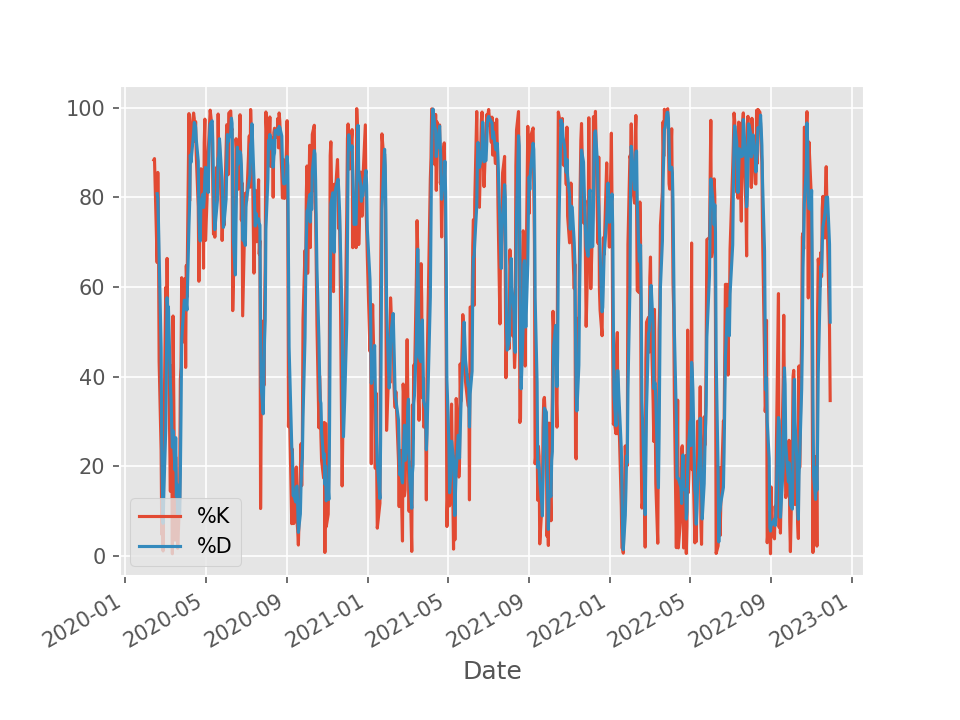

In [90]:
fig, ax = plt.subplots()
data[['%K', '%D']].plot(ax=ax);

<IPython.core.display.Javascript object>


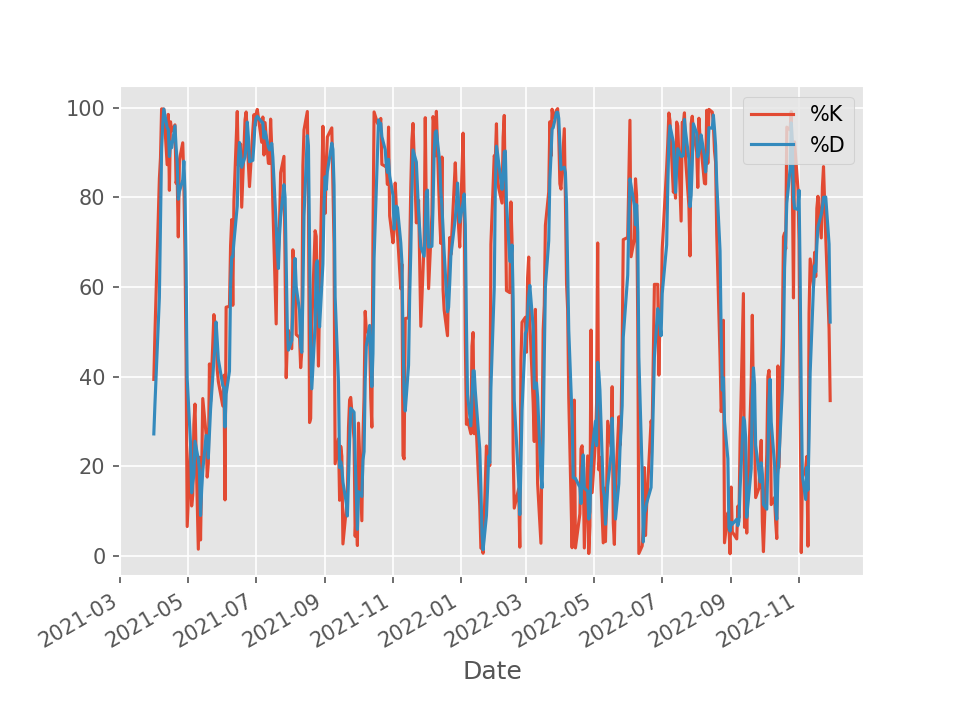

In [91]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-03-31':].plot(ax=ax);


In [ ]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-03-31':].plot(ax=ax)
ax.axhline(80, c = 'r', alpha = 0.3)
ax.axhline(20, c='r', alpha = 0.3)
data['Close'].loc['2021-03-31':].plot(ax=ax, alpha = 0.3, secondary_y = True)
plt.legend();